<a href="https://colab.research.google.com/github/anudeeplearning/Multi-Asset-Trading_Strategies/blob/main/Multiasset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Stocks Strategy

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf, numpy as np, pandas as pd, datetime as dt, matplotlib.pyplot as plt, scipy.stats as scs, math

In [ ]:
dji = ["AAPL", "AXP", "BA", "CAT", "CSCO", "CVX", "DIS", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD","MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "V", "VZ", "WBA", "WMT", "XOM"]

In [ ]:
start = dt.datetime(2012,1,1)
end=dt.datetime.now()

df=yf.download(dji,start,end)['Close']
df

[*********************100%***********************]  28 of 28 completed


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,NKE,PFE,PG,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.686786,48.389999,74.220001,93.980003,18.629999,110.370003,38.310001,95.360001,42.139999,178.107071,...,24.202499,20.844402,66.830002,58.990002,51.490002,25.747499,39.730000,33.060001,60.330002,86.000000
2012-01-04,14.765714,48.240002,74.330002,94.849998,18.990000,110.180000,38.849998,94.739998,42.740002,177.380493,...,24.555000,20.654650,66.800003,58.750000,52.240002,25.287500,39.209999,32.830002,59.709999,86.019997
2012-01-05,14.929643,48.799999,73.529999,95.519997,18.920000,109.099998,39.500000,94.580002,43.090000,176.539200,...,24.540001,20.493359,66.519997,59.330002,52.590000,25.477501,38.939999,32.720001,59.419998,85.760002
2012-01-06,15.085714,48.270000,73.980003,95.760002,18.850000,108.309998,39.910000,93.419998,43.200001,174.512421,...,24.497499,20.464895,66.360001,59.349998,52.779999,25.177500,38.330002,33.080002,59.000000,85.120003
2012-01-09,15.061786,48.389999,74.529999,97.099998,18.969999,109.489998,39.750000,94.690002,43.230000,173.604202,...,24.587500,20.702087,66.639999,59.689999,52.720001,24.975000,38.369999,33.500000,59.180000,85.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29,162.509995,154.020004,159.309998,198.250000,45.369999,163.779999,106.099998,333.390015,300.940002,130.789993,...,114.919998,50.509998,138.910004,158.699997,542.340027,212.110001,46.189999,39.619999,132.050003,96.930000
2022-08-01,161.509995,153.330002,169.070007,194.860001,45.279999,160.509995,106.220001,332.079987,305.820007,132.039993,...,114.300003,50.610001,142.899994,156.270004,535.380005,211.360001,46.259998,39.889999,132.539993,94.480003
2022-08-02,160.009995,151.600006,163.279999,183.509995,44.919998,159.139999,104.709999,327.880005,300.709991,131.809998,...,111.769997,49.689999,141.949997,156.710007,535.460022,206.259995,45.340000,39.049999,132.679993,94.070000


In [ ]:
stock_list=list(df.columns)

In [ ]:
#Here we are taking a moving average with window a 50 days
for ind in df:
  df[ind+' SMA50']=df[ind].rolling(50).mean()

In this case I'm considering only having long exposure and equal weightage. Not considering redistribution of capital among assets.
We take a long position when price is greater than moving average.

In [ ]:
for ind in stock_list:
  df[ind+' long'] = df[ind] > df[ind+' SMA50']
for ind in stock_list:
  df[ind+' long']=df[ind+' long'].shift()

In [ ]:
for ind in stock_list:
  df[ind+' Pct'] = df[ind].pct_change(1) * df[ind+' long']

In [ ]:
initial_capital = 1000

size = len(df[stock_list[0]])

for ind in stock_list:
  df[ind+' value'] = df[ind]
  df[ind+' value'].iat[0] = initial_capital/len(stock_list)
  for i in range(1,size):
    df[ind+' value'].iat[i] = df[ind+' value'][i-1]*df[ind][i]/df[ind][i-1] if df[ind+' long'][i] else df[ind+' value'][i-1]


df['Gross Leverage'] = df[stock_list[0]+' long']*1/len(stock_list)
for ind in stock_list[1:]:
  df['Gross Leverage']+= (df[ind+' long']/len(stock_list))

df['Value']=df[stock_list[0]+' value']
for ind in stock_list[1:]:
    df['Value'] += df[ind+' value']

df['BuyHold']=df['AAPL']
df['BuyHold'].iat[0]=initial_capital
for i in range(1,size):
  df['BuyHold'][i]=df['BuyHold'][i-1]
  for ind in stock_list:
    df['BuyHold'].iat[i] += (df[ind][i]/df[ind][i-1]-1)*initial_capital/len(stock_list)


df['Returns'] = df['Value'].pct_change(1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To ge

In [ ]:
x=df['AAPL']/df['AAPL'].shift(1)

In [ ]:
x

In [ ]:
df[stock_list]

In [ ]:
len(df[0])

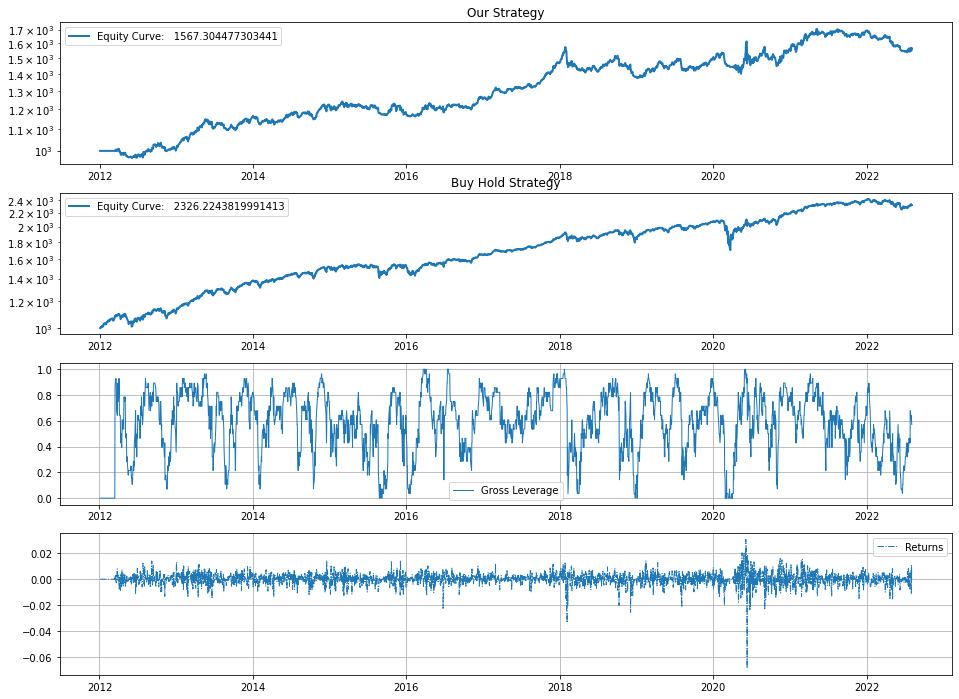

In [ ]:
points=500

plotting_data = df[:]
fig = plt.figure(figsize=(16,12))

#First Subplot
ax = fig.add_subplot(411)
ax.set_title('Our Strategy')
ax.semilogy(plotting_data['Value'], linestyle='-', label='Equity Curve:   '+ str(plotting_data['Value'][-2]), linewidth=2.0) 
ax.legend()
ax.grid(False)

ax = fig.add_subplot(412)
ax.set_title('Buy Hold Strategy')
ax.semilogy(plotting_data['BuyHold'], linestyle='-', label='Equity Curve:   '+str(plotting_data['BuyHold'][-2]), linewidth=2.0) 
ax.legend()
ax.grid(False)

#Second Subplot
ax = fig.add_subplot(413)
ax.plot(plotting_data['Gross Leverage'], label='Gross Leverage', linestyle='-', linewidth=1.0)
ax.legend()
ax.grid(True)

#Third Subplot
ax = fig.add_subplot(414)
ax.plot(plotting_data['Returns'], label='Returns', linestyle='-.', linewidth=1.0)
ax.legend()
ax.grid(True)

Other ratios which are important for judging the portfolio strategy are:



*   Annual Return
*   Cummulative Returns
*   Annual Volatility
*   Sharpe Ratio
*   Calmar Ratio
*   Stability
*   Max Drawdown
*   Omega Ratio
*   Sortino Ratio
*   Skew
*   Kurtosis
*   Tail Ratio
*   Daily Value at Risk















In [ ]:
#Assuming number of trading days in an year is 252
days_per_year = 252
total_trading_days = size-1
risk_free_rate = 0.025

#Assuming minimum acceptable return is same as risk free rate
MAR = risk_free_rate

In [ ]:
cumm_return = df['Value'][-1]/df['Value'][0]

In [ ]:
ann_return = pow((1+cumm_return),(days_per_year/total_trading_days))-1

In [ ]:
annual_volatility = scs.tstd(df['Returns'][1:])*math.sqrt(days_per_year)

In [ ]:
annual_volatility

0.0775462546899532

In [ ]:
ann_return

0.0932550211190557

In [ ]:
(df['Returns']<MAR/days_per_year).sum()

1274

In [ ]:
sharpe_ratio = (ann_return-risk_free_rate)/annual_volatility

In [ ]:
#downside_deviation = scs.tstd(df['Returns'][1:],(-100,MAR))*math.sqrt(days_per_year*(df['Returns']<MAR/days_per_year).sum()/(size-1))
downside_deviation = scs.tstd(df['Returns'][1:],(-100,MAR))*math.sqrt(days_per_year)

In [ ]:
downside_deviation

0.07699578002504066

In [ ]:
sortino_ratio = (ann_return-MAR)/downside_deviation

In [ ]:
skew = scs.skew(df['Returns'][1:])

In [ ]:
skew

-1.4428936973162694

In [ ]:
kurtosis = scs.kurtosis(df['Returns'][1:])

In [ ]:
kurtosis

17.959221415717156

In [ ]:
sortino_ratio

0.8864774289819225

In [ ]:
print("Annual Return is: ", ann_return)
print("Cummulative Return is: ",cumm_return)
print("Annual Volatility is: ", annual_volatility)
print("Sharpe Ratio is: ", sharpe_ratio)
print("Sortino Ratio is: ", sortino_ratio)
print("Skew is: ", skew)
print("kurtois is: ", kurtosis)


Annual Return is:  0.0932550211190557
